<a href="https://colab.research.google.com/github/jmijares4/DS-portfolio/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import numpy as np

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Assingn a numeric value for se gender of the passengers.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex_numeric'] = le.fit_transform(df['Sex'])

df['Sex_numeric'] = df['Sex_numeric'].astype('int32')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


###Male = 1, Female = 0

In [4]:
#Assingn a numeric value for port of embarkation.
le = LabelEncoder()
df['Embarked_numeric'] = le.fit_transform(df['Embarked'])

df['Embarked_numeric'] = df['Embarked_numeric'].astype('int32') # Use Int64 to handle missing values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


In [5]:
# Just checking so I won´t have problems with null values below.
df[df['Embarked_numeric'] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,3
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,3


In [6]:
df.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Sex_numeric           int32
Embarked_numeric      int32
dtype: object

In [7]:
print(df.isnull().sum())

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Sex_numeric           0
Embarked_numeric      0
dtype: int64


###Age has 177 missing values, thats a problem.

In [9]:
from sklearn.impute import SimpleImputer  # Import for imputation
from sklearn.model_selection import train_test_split

# Select features and target.
# Split the data into features (X) and target (y) to avoid overfitting.
# Scikit Learn shuffles de data by default, it can be turned off by shuffle=false after defining the data.
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']], df[['Survived']])

# In case I don´t want to split
'''X_train = df[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
y_train = df['Survived']'''

# Select test data
'''X_test = df[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']]
y_test = df['Survived']'''


def handle_missing_values(data, strategy='mean'):
  """
  This function handles missing values in the 'Age' column based on the specified strategy.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.
      strategy (str, optional): The strategy to use for imputation.
          Can be 'mean', 'median', 'mode', or 'drop'. Defaults to 'mean'.

  Returns:
      pandas.DataFrame: The DataFrame with missing values handled.
  """

  # Create a copy of the data to avoid modifying the original
  data_copy = data.copy()

  # Handle missing values in the 'Age' column
  if strategy == 'mean':
    imputer = SimpleImputer(strategy='mean')
    data_copy['Age'] = imputer.fit_transform(data_copy[['Age']])
    print('Age nulls resolved by mean statistical.')
  elif strategy == 'median':
    imputer = SimpleImputer(strategy='median')
    data_copy['Age'] = imputer.fit_transform(data_copy[['Age']])
  elif strategy == 'mode':
    imputer = SimpleImputer(strategy='most_frequent')
    data_copy['Age'] = imputer.fit_transform(data_copy[['Age']])
  elif strategy == 'drop':
    data_copy.dropna(subset=['Age'], inplace=True)  # Drop rows with missing 'Age'
  else:
    raise ValueError("Invalid strategy. Choose 'mean', 'median', 'mode', or 'drop'.")

  return data_copy


# Choose a strategy for handling missing values (replace 'mean' with your preference)
strategy = 'mean'  # Options: 'mean', 'median', 'mode', 'drop'

# Apply the chosen strategy to handle missing values in both training and test data
X_train = handle_missing_values(X_train.copy(), strategy=strategy)
X_test = handle_missing_values(X_test.copy(), strategy=strategy)

# Now you have X_train and X_test with missing values handled according to your choice

# ... Rest of your TensorFlow model training code ...


Age nulls resolved by mean statistical.
Age nulls resolved by mean statistical.


In [10]:

import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(7,)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=1500)

# Evaluate the model
model.evaluate(X_test, y_test)

Epoch 1/1500
21/21 [==============================] - 1s 8ms/step - loss: 0.4067 - accuracy: 0.5838
Epoch 2/1500
21/21 [==============================] - 0s 9ms/step - loss: 0.3922 - accuracy: 0.6078
Epoch 3/1500
21/21 [==============================] - 0s 8ms/step - loss: 0.3920 - accuracy: 0.6078
Epoch 4/1500
21/21 [==============================] - 0s 9ms/step - loss: 0.3572 - accuracy: 0.6198
Epoch 5/1500
21/21 [==============================] - 0s 8ms/step - loss: 0.3922 - accuracy: 0.6078
Epoch 6/1500
21/21 [==============================] - 0s 8ms/step - loss: 0.3922 - accuracy: 0.6078
Epoch 7/1500
21/21 [==============================] - 0s 7ms/step - loss: 0.3922 - accuracy: 0.6078
Epoch 8/1500
21/21 [==============================] - 0s 10ms/step - loss: 0.3632 - accuracy: 0.6347
Epoch 9/1500
21/21 [==============================] - 0s 9ms/step - loss: 0.3185 - accuracy: 0.6722
Epoch 10/1500
21/21 [==============================] - 0s 10ms/step - loss: 0.3134 - accuracy: 0.68

[0.17544236779212952, 0.7937219738960266]

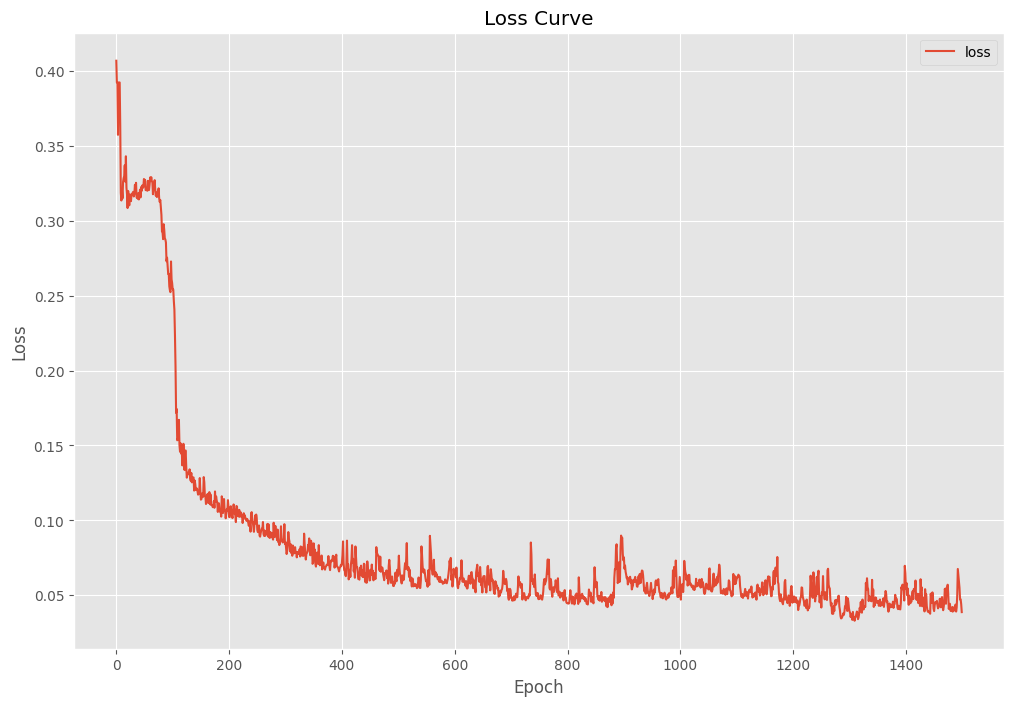

In [11]:
# Get the loss values from the history object
loss = history.history['loss']

# Create a DataFrame with the loss values
loss_df = pd.DataFrame({'loss': loss})

# Plot the loss curve using Seaborn
sns.lineplot(data=loss_df)

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [14]:
#Just for the lols, let´s see if I would survive the Titanic sinking.

my_data = [3, 1, 32, 1, 1, 9, 3]
my_data_tensor = tf.convert_to_tensor([my_data]) # Add an extra set of brackets to make it 2D

i_survived = model.predict(my_data_tensor)

if i_survived > 0.5:
  print("I would have survived the Titanic sinking. :D")
else:
  print("I would not have survived the Titanic sinking. :(")

1/1 [==============================] - 0s 106ms/step
I would not have survived the Titanic sinking. :(


In [15]:
dt = pd.read_csv('test.csv')
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
#Assingn a numeric value for se gender of the passengers.
dt['Sex_numeric'] = le.fit_transform(dt['Sex'])

dt['Sex_numeric'] = dt['Sex_numeric'].astype('int32')

dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [17]:
#Assingn a numeric value for port of embarkation.
dt['Embarked_numeric'] = le.fit_transform(dt['Embarked'])

dt['Embarked_numeric'] = dt['Embarked_numeric'].astype('int32') # Use Int64 to handle missing values
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2


In [ ]:
dt.dtypes

PassengerId           int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Sex_numeric           int32
Embarked_numeric      int32
dtype: object

In [19]:
# Handle missing values in the 'Age' column of the 'dt' DataFrame using the 'mean' strategy
dt = handle_missing_values(dt.copy(), strategy='mean')

# Now the 'dt' DataFrame has missing values in the 'Age' column handled


Age nulls resolved by mean statistical.


In [21]:
def handle_missing_fare(data):
  """
  This function handles missing values in the 'Fare' column based on the mean fare of passengers with the same 'Pclass'.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.

  Returns:
      pandas.DataFrame: The DataFrame with missing values in 'Fare' handled.
  """

  # Create a copy of the data to avoid modifying the original
  data_copy = data.copy()

  # Group data by 'Pclass' and calculate the mean 'Fare' for each group
  mean_fares = data_copy.groupby('Pclass')['Fare'].mean()

  # Iterate through rows with missing 'Fare' values
  for i in range(len(data_copy)):
    if pd.isna(data_copy.loc[i, 'Fare']):
      # Get the 'Pclass' of the current row
      pclass = data_copy.loc[i, 'Pclass']

      # Replace the missing 'Fare' value with the mean fare for the corresponding 'Pclass'
      data_copy.loc[i, 'Fare'] = mean_fares[pclass]

  return data_copy


# Apply the function to handle missing values in 'Fare'
dt = handle_missing_fare(dt)

# Now the 'dt' DataFrame has missing values in the 'Fare' column handled


In [22]:
print(dt.isnull().sum())

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               327
Embarked              0
Sex_numeric           0
Embarked_numeric      0
dtype: int64


In [23]:
data_type = type(X_train.iloc[0, 0])

# Print the data type
print(f"The model expects data of type: {data_type}")


The model expects data of type: <class 'numpy.int64'>


###Important to know the data type the model expects.

In [24]:
# Convert the specified columns to int64
dt['Pclass'] = dt['Pclass'].astype('int64')
dt['Sex_numeric'] = dt['Sex_numeric'].astype('int64')
dt['Age'] = dt['Age'].astype('int64')
dt['SibSp'] = dt['SibSp'].astype('int64')
dt['Parch'] = dt['Parch'].astype('int64')
dt['Fare'] = dt['Fare'].astype('int64')
dt['Embarked_numeric'] = dt['Embarked_numeric'].astype('int64')

# Make predictions for each row in the dataframe
dt['Survival_predict'] = model.predict(dt[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']])

14/14 [==============================] - 0s 4ms/step


In [25]:
dt['Survival_predict'] = dt['Survival_predict'].apply(lambda x: 1 if x > 0.5 else 0)
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric,Survival_predict
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9,NaN,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8,NaN,S,1,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12,NaN,S,0,2,1


In [26]:
dt.to_csv('dt.csv')
#Download to present make presentation to stakeholders.
#Accuracy in prediction of 88.1%.

In [27]:
df['Pclass'] = df['Pclass'].astype('int64')
df['Sex_numeric'] = df['Sex_numeric'].astype('int64')
#df['Age'] = df['Age'].astype('int64')
df['SibSp'] = df['SibSp'].astype('int64')
df['Parch'] = df['Parch'].astype('int64')
df['Fare'] = df['Fare'].astype('int64')
dt['Embarked_numeric'] = df['Embarked_numeric'].astype('int64')

df['Survival_predict'] = model.predict(df[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric']])

28/28 [==============================] - 0s 4ms/step


In [28]:
#To test the success rate for the prediction.
df['Survival_predict'] = df['Survival_predict'].apply(lambda x: 1 if x > 0.5 else 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric,Survival_predict
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,1,2,0


In [29]:
df.to_csv('df.csv')

#The deep learning model yielded a promising result, with an accuracy of 88.1% on the test data. This suggests its potential for real-world applications.